# PROCESSAMENTO DE IMAGENS 

**Objetivos da aula:**

*   Conhecer processo generico de filtro de convolução
*   conhecer os filtros de blurring (suavização)
*   conhecer o filtro de sharpening (realce)
*   conhecer o detetor linhas de canny

## **Filtro de convolução**

O **filtro de convolução** é um nomes dados para **filtragem no domínio espacial**. Esse processo ocorre com a aplicação de **filtros** (pequenas matrizes), posicionados sob cada pixel da imagem. Estes filtros, normalmente, são chamados de **kernels (ou núcleos)**. O resultado final do valor do pixel é calculado através de um **produto de convolução**.

Normalmente os **kernels** são matrizes 3x3, 5x5 ou 7x7.


<img src="convolution.png" width="600" >

<img src="same_padding_no_strides.gif" width="400" >



**Observação**

Embora o nome convolução seja muito usado, na prática realizamos o processo de **correlação**, para realizar a convolução é necessário realizar a inversão da **mascara (matriz)**, o que não é um problema pois em **processamento de imagem**, tipicamente os **kernels** são simétricos, logo os resultados de convolução e correlação não mudam. 


## **Implementação na OpenCV**

Podemos implementar o produto de convolução montando uma estrutura com dois for para varrer a imagem toda, pixel-a-pixel.Não é a forma mais eficiente, pois Na OpenCV tem uma função built-in para implementação de filtro de convolução a **cv2.filter2D()** 

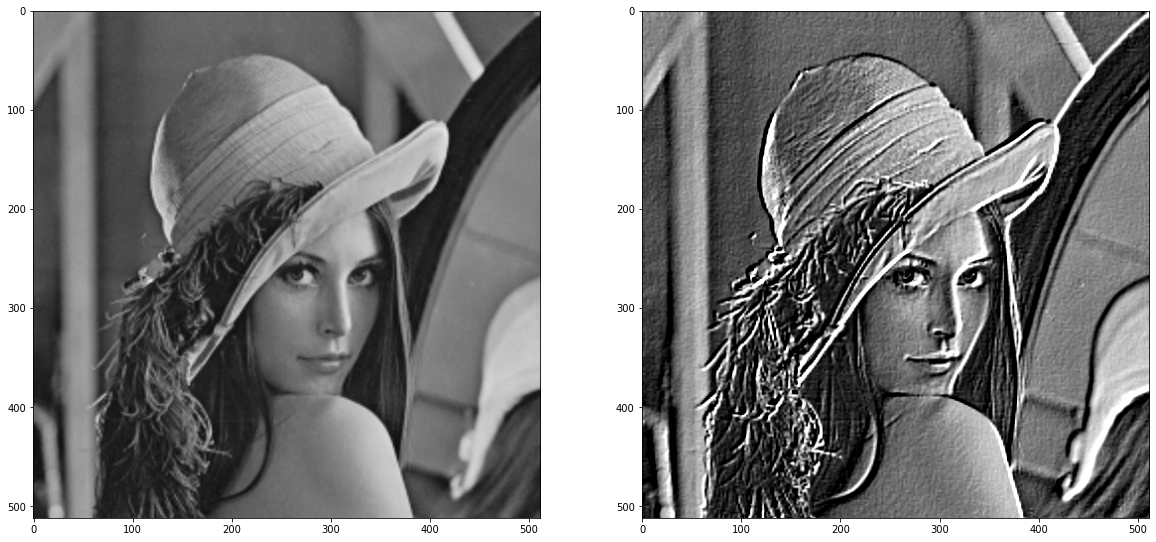

In [112]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np


#carrega imagem
img = cv2.imread('lena.png')


# Define o kernel
kernel = np.array([[4, 0, 0], 
                   [0, 1, 0],
                   [0, 0, -4]])
kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1) #normaliza os pesos entre 0 e 1



# Realiza o produto de convolução
imgf = cv2.filter2D(img,-1,kernel)



plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1);plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2);plt.imshow(imgf, cmap="gray")

plt.show()

### **FILTROS PARA BLURRING**

O filtro de **blurring (borramento)** consiste na  perda gradual de foco da imagem, produzindo a sensação que ela está borrada. Em outras palavras são filtros passa-baixa.

Existem diversos métodos para construções de kernels para blurring:


*   **filtro da média (box filter)**: blur = cv2.blur(img,(5,5))
*   **filtro gaussiano**: blur = cv2.GaussianBlur(img,(5,5),0)
*   **filtro da mediana**: blur = cv2.medianBlur(img,5)
*   **filtro bilateral**: blur = cv2.bilateralFilter(img,9,75,75)

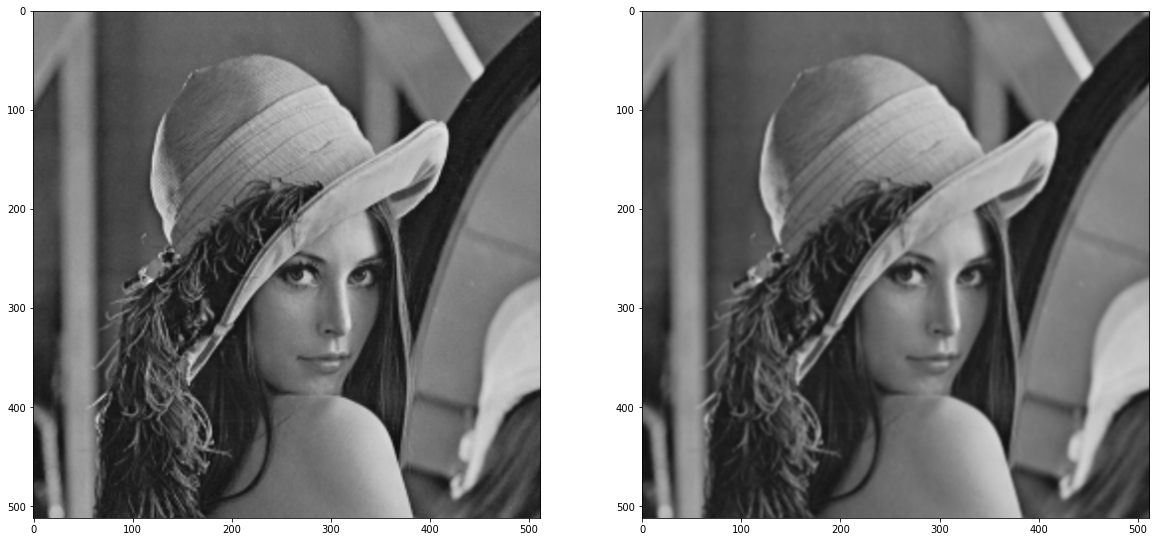

In [113]:
import numpy as np
import cv2 

#carrega imagem
img = cv2.imread('lena.png')


# Realiza o blur
imgf = cv2.GaussianBlur(img,(5,5),0)

#exibe resultado filtrado
plt.figure(figsize = (20,20))
plt.subplot(1, 2, 1);plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1, 2, 2);plt.imshow(imgf, cmap="Greys_r", vmin=0, vmax=255);

### Desafio 1

Escolha uma imagem da sua preferência e faça um estudo sobre os diferentes tipos de filtros de borramento, analise também o que acontece quando é alterado o tamanho do kernel.


In [114]:
#Implemente seu código aqui.






### **FILTRO DE SHARPENING**

O filtro de **sharpening** consiste no ganho gradual de foco de uma imagem, produzindo a sensação que ela está cada vez mais bem definida. É uma aproximação da inversa do filtro de blurring. 

Existem diversos métodos para construções de kernels para blurring:


*   **filtro Sobel X**: imgf = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
*   **filtro Sobel Y**: imgf = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
*   **filtro Laplaciano**: imgf = cv2.Laplacian(img,cv2.CV_64F)


Abaixo, temos as formas matriciais do filtro de sharpening.

In [115]:
#Filtro Laplaciano
kernel = np.array([[0, -1, 0], 
                   [-1, 4, -1], 
                   [0, -1, 0]])

kernel = np.array([[-1, -1, -1], 
                   [-1, 8, -1], 
                   [-1, -1, -1]])
#filtro de Sobel X
kernel = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]])

kernel = np.array([[-1, -2, -1], 
                   [ 0, 0, 0], 
                   [-1, 0, 1]])

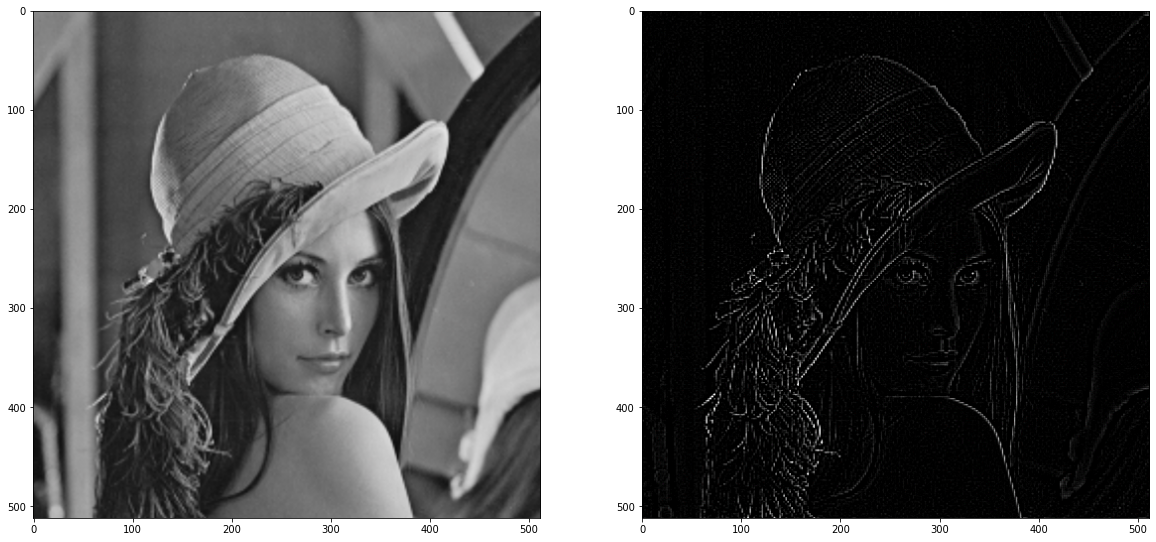

In [116]:
import numpy as np
import cv2


#carrega imagem
img = cv2.imread('lena.png')

# Monta o kernel filtro 
kernel = np.array([[-1, -1, -1], 
                   [-1, 8, -1], 
                   [-1, -1, -1]])

# Realiza o produto de convolução
imgf = cv2.filter2D(img,-1,kernel)



#exibe resultado filtrado
plt.figure(figsize = (20,20))
plt.subplot(1, 2, 1);plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1, 2, 2);plt.imshow(imgf, cmap="Greys_r", vmin=0, vmax=255);

#plt.imshow((imgf * 255).astype(np.uint8)

### Desafio 2

Escolha uma imagem da sua preferência e faça um estudo sobre os diferentes tipos de filtros de contraste, analise também o que acontece quando é alterado o tamanho do kernel.

In [117]:
#implemente seu código aqui.

### **FILTRO DE LIMIARIZAÇÃO**

O filtro de **limiariazação** converte uma imagem em tons de ciza para uma imagem binaria.

Podemos utilizar diversas tecnicas de limiarização, cada um com sua particularidade, leia a documentação para mais detalhes: 

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV
- cv2.THRESH_OTSU


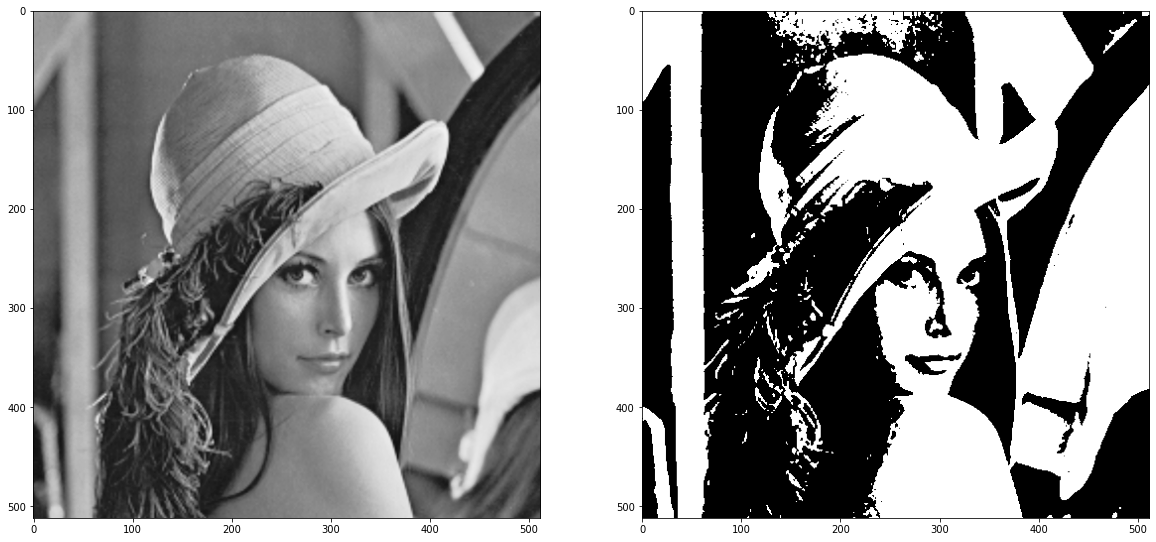

In [118]:
import numpy as np
import cv2


#carrega imagem
image = cv2.imread('lena.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Filtro de limiarização
ret3,th3 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)


#exibe resultado filtrado
plt.figure(figsize = (20,20))
plt.subplot(1, 2, 1);plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1, 2, 2);plt.imshow(th3, cmap="Greys_r", vmin=0, vmax=255);

### **FILTRO DE BORDAS DE CANNY**

O filtro de **canny** é um detector de linhas e bordas que combina de forma mais sofisticada operações lineares. 

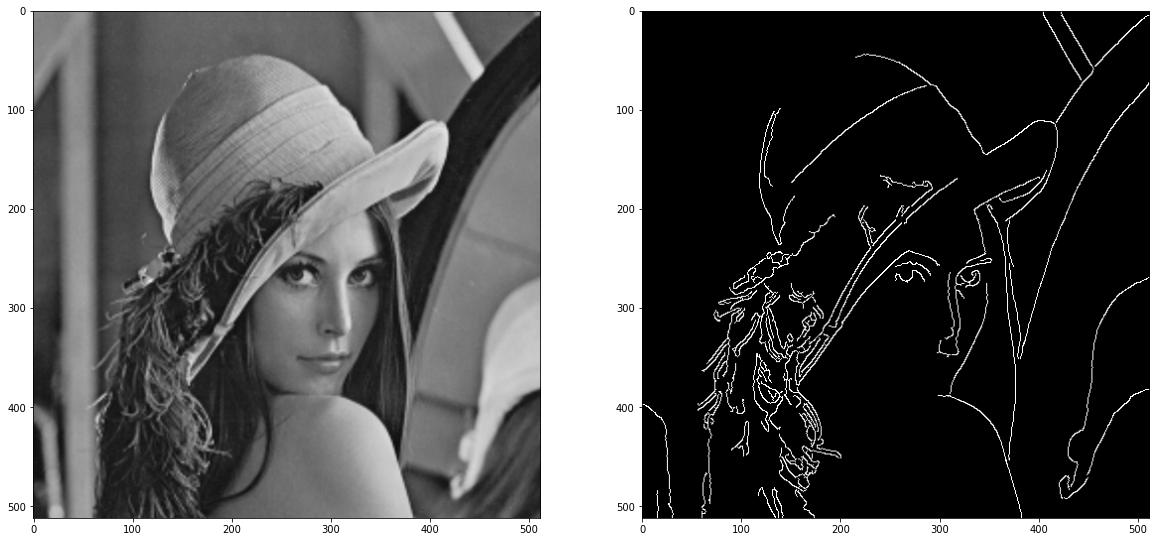

In [119]:
import numpy as np
import cv2


#carrega imagem
img = cv2.imread('lena.png')

min_contrast = 50
max_contrast = 200

imgfb = cv2.GaussianBlur(img,(5,5),0)
imgf = cv2.Canny(imgfb, min_contrast, max_contrast )


#exibe resultado filtrado
plt.figure(figsize = (20,20))
plt.subplot(1, 2, 1);plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2);plt.imshow(imgf, cmap="gray");

### Desafio 3

O Filtro de Canny é um dos mais utilizados até hoje, por ser robusto e apresentar bons resultados. Implemente o detector de bordas de canny e analise os efeitos alterandos os valores de threshold.

In [120]:
#Seu código

### **FILTRO DE SOBREPOSIÇÃO DE IMAGENS**

O filtro de **sobreposição** mescla duas imagens gerando efeito de sobreposição, ou Blending.

A operação da imagem de saida é a seguinte: **`g(x)=(1−α)∗f0(x)+α∗f1(x)`**

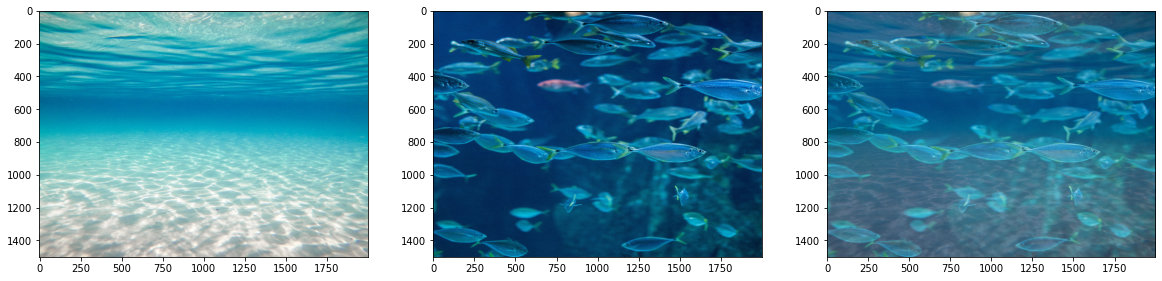

In [121]:
import numpy as np
import cv2

alpha = 0.35
beta = (1.0 - alpha)

src1 = cv2.imread("mar.jpeg")
src2 = cv2.imread("peixe.jpeg")

src1= cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)
src2= cv2.cvtColor(src2, cv2.COLOR_BGR2RGB)

# faz um resize da imagem 
escala = 0.5
lar = int(src1.shape[0] * escala)
alt = int(src1.shape[1] * escala)
src1 = cv2.resize(src1, (lar,alt))
src2 = cv2.resize(src2, src1.shape[1::-1])


# faz 
dst = cv2.addWeighted(src1, alpha, src2, beta, 0.0)


#exibe resultado filtrado
plt.figure(figsize = (20,20))
plt.subplot(1, 3, 1);plt.imshow(src1)
plt.subplot(1, 3, 2);plt.imshow(src2)
plt.subplot(1, 3, 3);plt.imshow(dst);

# Desafio 5

Usando o código `webcam.py` faça a implementação dos filtros estudados hoje. Análise os efeitos de sobreposição dos filtros. 

In [122]:
#Seu código aqui.